In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import metrics

In [2]:
data = pd.read_csv("customer_booking.csv",encoding ="latin-1")
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## EDA

In [3]:
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [4]:
#no null value found

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
data.loc[data["booking_origin"]== "(not set)"] =np.nan 

In [7]:
data.isna().sum()

num_passengers           84
sales_channel            84
trip_type                84
purchase_lead            84
length_of_stay           84
flight_hour              84
flight_day               84
route                    84
booking_origin           84
wants_extra_baggage      84
wants_preferred_seat     84
wants_in_flight_meals    84
flight_duration          84
booking_complete         84
dtype: int64

In [8]:
booking=data.dropna()
booking.reset_index(drop=True)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.0,Internet,RoundTrip,262.0,19.0,7.0,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0
1,1.0,Internet,RoundTrip,112.0,20.0,3.0,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0
2,2.0,Internet,RoundTrip,243.0,22.0,17.0,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0
3,1.0,Internet,RoundTrip,96.0,31.0,4.0,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
4,2.0,Internet,RoundTrip,68.0,22.0,15.0,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49911,2.0,Internet,RoundTrip,27.0,6.0,9.0,Sat,PERPNH,Australia,1.0,0.0,1.0,5.62,0.0
49912,1.0,Internet,RoundTrip,111.0,6.0,4.0,Sun,PERPNH,Australia,0.0,0.0,0.0,5.62,0.0
49913,1.0,Internet,RoundTrip,24.0,6.0,22.0,Sat,PERPNH,Australia,0.0,0.0,1.0,5.62,0.0
49914,1.0,Internet,RoundTrip,15.0,6.0,11.0,Mon,PERPNH,Australia,1.0,0.0,1.0,5.62,0.0


<Axes: xlabel='flight_day', ylabel='count'>

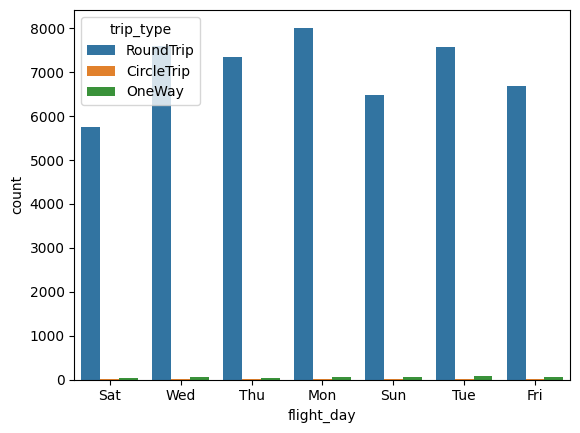

In [9]:
sns.countplot(booking ,x="flight_day",hue="trip_type")

<Axes: xlabel='booking_complete', ylabel='count'>

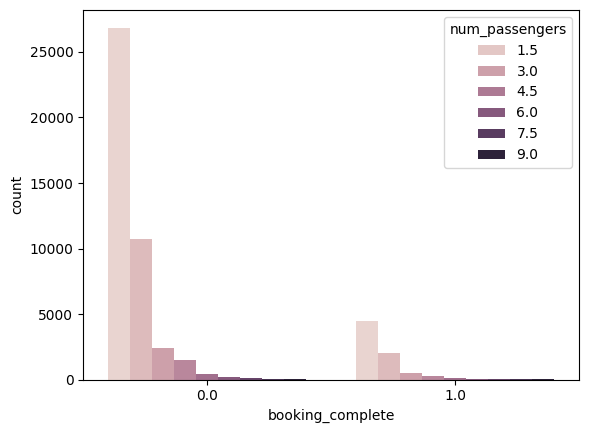

In [10]:
sns.countplot(booking,x="booking_complete",hue="num_passengers")

In [11]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


In [44]:
for columns in booking.select_dtypes(include =["object"]).columns:
     booking[columns]=label.fit_transform(booking[columns])

In [13]:
booking

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.0,0,2,262.0,19.0,7.0,2,0,60,1.0,0.0,0.0,5.52,0.0
1,1.0,0,2,112.0,20.0,3.0,2,0,60,0.0,0.0,0.0,5.52,0.0
2,2.0,0,2,243.0,22.0,17.0,6,0,35,1.0,1.0,0.0,5.52,0.0
3,1.0,0,2,96.0,31.0,4.0,2,0,60,0.0,0.0,1.0,5.52,0.0
4,2.0,0,2,68.0,22.0,15.0,6,0,35,1.0,0.0,1.0,5.52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2.0,0,2,27.0,6.0,9.0,2,720,3,1.0,0.0,1.0,5.62,0.0
49996,1.0,0,2,111.0,6.0,4.0,3,720,3,0.0,0.0,0.0,5.62,0.0
49997,1.0,0,2,24.0,6.0,22.0,2,720,3,0.0,0.0,1.0,5.62,0.0
49998,1.0,0,2,15.0,6.0,11.0,1,720,3,1.0,0.0,1.0,5.62,0.0


## training data and model

In [14]:
x = booking.drop("booking_complete",axis=1)
y = booking["booking_complete"]

In [15]:
from sklearn.model_selection import train_test_split
stat_col =y
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,  random_state =42,stratify=stat_col)

In [16]:
# If class imbalance is severe, try oversampling the minority class:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [17]:
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble  import  RandomForestClassifier
model= LogisticRegression(max_iter=3000)
model1 = RandomForestClassifier(class_weight='balanced', random_state=42)
model


LogisticRegression(max_iter=3000)

In [18]:
sample_x =X_train_res[:5]
sample_y =y_train_res[:5]

In [19]:
model.fit(X_train_res,y_train_res)


LogisticRegression(max_iter=3000)

In [20]:
model1.fit(X_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [21]:
sample_ypred=model.predict(sample_x)
sample_ypred1=model1.predict(sample_x)

In [22]:
#cross validation
from sklearn.model_selection import cross_val_score
scores  =cross_val_score(model,X_train_res,y_train_res,cv=5)
scores1 =cross_val_score(model1,X_train_res,y_train_res,cv=5)

In [23]:
print("model : Linear regression ")
print("cross validation score : ",scores)
print("mean cross validation  : ",scores.mean())
print("model :  RandomForest Classifer")
print("cross validation score : ",scores1)
print("mean cross validation  : ",scores1.mean())

model : Linear regression 
cross validation score :  [0.6139124  0.66058152 0.66092462 0.65444641 0.66342756]
mean cross validation  :  0.6506585027395889
model :  RandomForest Classifer
cross validation score :  [0.61008465 0.97313213 0.97305654 0.97232038 0.97283569]
mean cross validation  :  0.9002858772558419


# here random forest is performing better
### so now choosing model = RandomForestClassifer

In [24]:
from joblib import dump,load
dump(model1,"BA.joblib")

['BA.joblib']

In [25]:
final_pred=model1.predict(x_test)

In [26]:
print(f"accuracy:{metrics.accuracy_score(y_test,final_pred)}")
print(f"precision:{metrics.precision_score(y_test,final_pred)}")
print(f"recall:{metrics.recall_score(y_test,final_pred)}")
print(f"f1 score:{metrics.f1_score(y_test,final_pred)}")

accuracy:0.8434495192307693
precision:0.43566176470588236
recall:0.15874079035498995
f1 score:0.23269513991163476


In [27]:
print(y_train.value_counts())
print(y_test.value_counts())


booking_complete
0.0    33961
1.0     5971
Name: count, dtype: int64
booking_complete
0.0    8491
1.0    1493
Name: count, dtype: int64


In [28]:
data["booking_complete"].value_counts()

booking_complete
0.0    42452
1.0     7464
Name: count, dtype: int64

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,final_pred))
print(classification_report(y_test,final_pred))


[[8184  307]
 [1256  237]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      8491
         1.0       0.44      0.16      0.23      1493

    accuracy                           0.84      9984
   macro avg       0.65      0.56      0.57      9984
weighted avg       0.80      0.84      0.81      9984



In [30]:
feature_importance =model1.feature_importances_

In [31]:
feature  =x.columns
impotance_df =pd.DataFrame({"Feature":feature,"Importance": feature_importance})

In [32]:
impotance_df

,Feature,Importance
0,num_passengers,0.082895
1,sales_channel,0.020806
2,trip_type,0.001118
3,purchase_lead,0.090470
4,length_of_stay,0.087330
5,flight_hour,0.068985
6,flight_day,0.042474
7,route,0.084138
8,booking_origin,0.128900
9,wants_extra_baggage,0.112310


In [33]:
impotance_df =impotance_df.sort_values(by="Importance",ascending=False)

In [34]:
impotance_df

,Feature,Importance
8,booking_origin,0.128900
9,wants_extra_baggage,0.112310
11,wants_in_flight_meals,0.106918
10,wants_preferred_seat,0.104022
3,purchase_lead,0.090470
4,length_of_stay,0.087330
7,route,0.084138
0,num_passengers,0.082895
12,flight_duration,0.069634
5,flight_hour,0.068985


C:\Users\abhi123\AppData\Local\Temp\ipykernel_18404\2531226454.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(impotance_df,x="Importance",y="Feature",palette ="viridis")


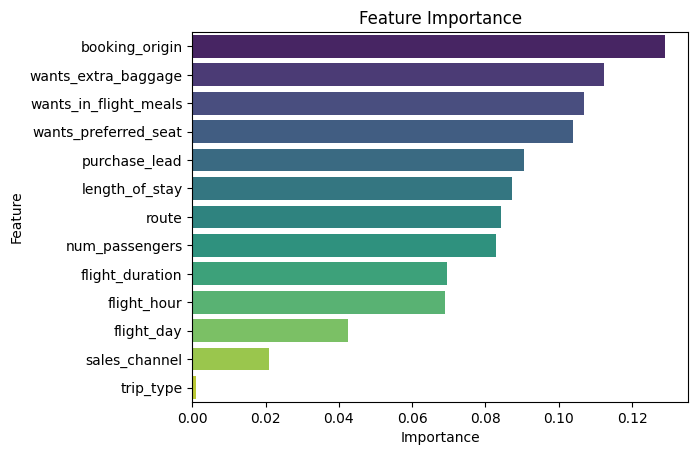

In [35]:
sns.barplot(impotance_df,x="Importance",y="Feature",palette ="viridis")
plt.figsize=(15,20)
plt.title("Feature Importance")
plt.show()


# test the model

In [36]:
# test the model
list(x.iloc[82])

[1.0, 0.0, 2.0, 15.0, 31.0, 17.0, 1.0, 6.0, 50.0, 0.0, 0.0, 0.0, 8.83]

In [37]:
model=load("BA.joblib")

In [43]:
value= np.array([[1.0, 0.0, 2.0, 15.0, 31.0, 17.0, 1.0, 6.0, 50.0, 0.0, 0.0, 0.0, 8.83]])
predicted_value = model.predict(value)
print("Predicted Value for Given Input:",predicted_value)

Predicted Value for Given Input: [1.]


C:\Users\abhi123\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
